# chapter2 feature engineering code

## install dependencies

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## degree

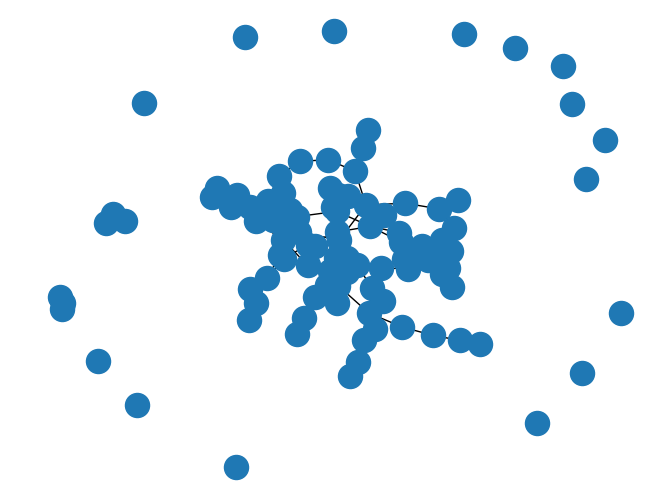

In [84]:
G = nx.gnp_random_graph(100, 0.02, seed=10374196)
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

### create subgraph

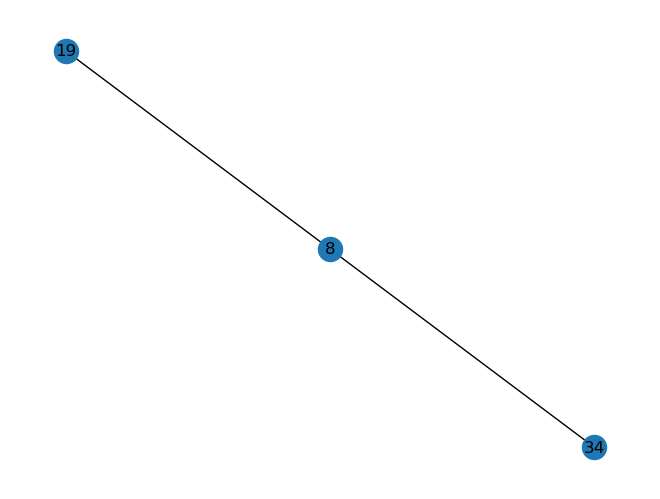

In [7]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[1])  # according node attribute
nx.draw(Gcc, with_labels=True)

### degree feature

In [8]:
G.degree()

DegreeView({0: 2, 1: 4, 2: 4, 3: 4, 4: 2, 5: 4, 6: 4, 7: 2, 8: 2, 9: 1, 10: 3, 11: 0, 12: 1, 13: 2, 14: 6, 15: 2, 16: 0, 17: 0, 18: 3, 19: 1, 20: 3, 21: 1, 22: 1, 23: 1, 24: 1, 25: 3, 26: 0, 27: 2, 28: 2, 29: 0, 30: 2, 31: 1, 32: 1, 33: 0, 34: 1, 35: 4, 36: 2, 37: 2, 38: 1, 39: 5, 40: 5, 41: 1, 42: 4, 43: 1, 44: 0, 45: 2, 46: 3, 47: 1, 48: 2, 49: 2, 50: 3, 51: 2, 52: 0, 53: 3, 54: 0, 55: 3, 56: 1, 57: 2, 58: 2, 59: 2, 60: 1, 61: 1, 62: 0, 63: 2, 64: 4, 65: 5, 66: 2, 67: 0, 68: 2, 69: 2, 70: 1, 71: 3, 72: 2, 73: 4, 74: 1, 75: 2, 76: 2, 77: 2, 78: 5, 79: 2, 80: 0, 81: 1, 82: 2, 83: 1, 84: 2, 85: 0, 86: 4, 87: 2, 88: 4, 89: 2, 90: 2, 91: 3, 92: 0, 93: 2, 94: 0, 95: 4, 96: 1, 97: 4, 98: 0, 99: 2})

In [94]:
sorted_degree = sorted([d for n, d in dict(G.degree()).items()], reverse=True)
sorted_degree

[6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

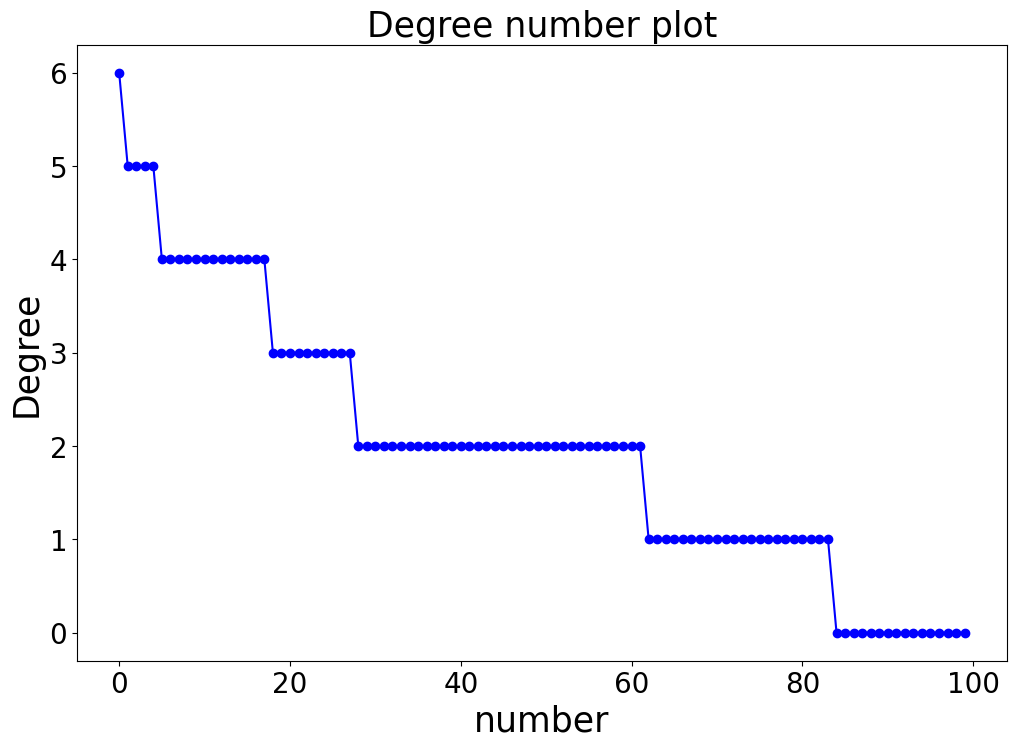

In [97]:
plt.figure(figsize=(12, 8))
plt.plot(sorted_degree, "b-", marker="o")
plt.title("Degree number plot", fontsize=25)
plt.xlabel("number", fontsize=25)
plt.ylabel("Degree", fontsize=25)
plt.tick_params(labelsize=20)   # set x, y tick

In [11]:
# np.unique could get number of item in list
x = np.unique(sorted_degree, return_counts=True)[0]
y = np.unique(sorted_degree, return_counts=True)[1]

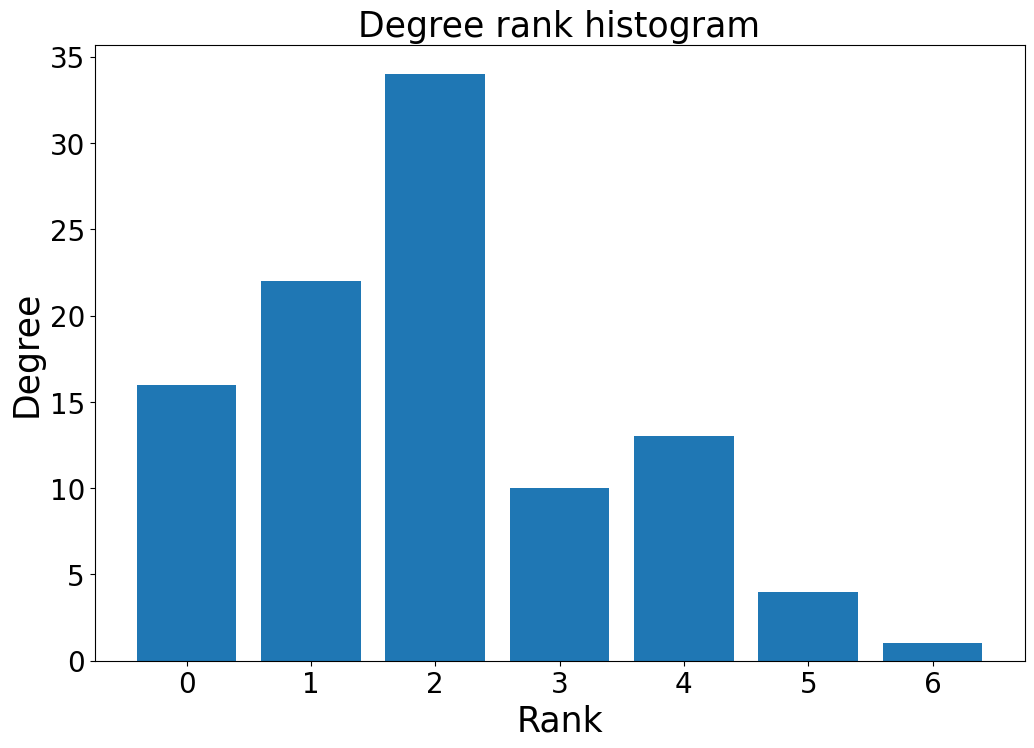

In [96]:
plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.title("Degree rank histogram", fontsize=25)
plt.xlabel("Rank", fontsize=25)
plt.ylabel("Degree", fontsize=25)
plt.tick_params(labelsize=20)   # set x, y tick

## lollipop_graph feature

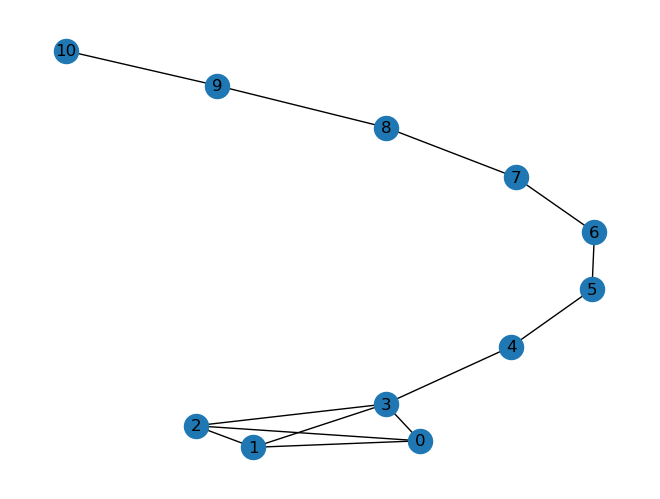

In [13]:
G = nx.lollipop_graph(4, 7)
nx.draw(G, with_labels=True)

In [14]:
nx.radius(G)    # minimum eccentricity
nx.diameter(G)  # maximum eccentricity

8

In [15]:
# node to other nodes max distance
dict(sorted(nx.eccentricity(G).items(), key=lambda item: item[1], reverse=True))

{0: 8, 1: 8, 2: 8, 10: 8, 3: 7, 9: 7, 4: 6, 8: 6, 5: 5, 7: 5, 6: 4}

In [19]:
nx.center(G)    # minimum eccentricity node

[6]

### density
$n$ node_number, $m$ link_number
Undirected graph $$density = \frac{2m}{n(n-1)}$$
directed graph $$density = \frac{m}{n(n-1)}$$

In [20]:
nx.density(G)

0.23636363636363636

### node to other node shortest path

In [34]:
print(nx.single_source_shortest_path(G, 3))
nx.single_source_shortest_path_length(G, 3).items()

{3: [3], 0: [3, 0], 1: [3, 1], 2: [3, 2], 4: [3, 4], 5: [3, 4, 5], 6: [3, 4, 5, 6], 7: [3, 4, 5, 6, 7], 8: [3, 4, 5, 6, 7, 8], 9: [3, 4, 5, 6, 7, 8, 9], 10: [3, 4, 5, 6, 7, 8, 9, 10]}


dict_items([(3, 0), (0, 1), (1, 1), (2, 1), (4, 1), (5, 2), (6, 3), (7, 4), (8, 5), (9, 6), (10, 7)])

In [35]:
for source in G.nodes():
    for dist, path_len in nx.single_source_shortest_path_length(G, source).items():
        print("{} -> {} shortest path len {}".format(source, dist, path_len))

0 -> 0 shortest path len 0
0 -> 1 shortest path len 1
0 -> 2 shortest path len 1
0 -> 3 shortest path len 1
0 -> 4 shortest path len 2
0 -> 5 shortest path len 3
0 -> 6 shortest path len 4
0 -> 7 shortest path len 5
0 -> 8 shortest path len 6
0 -> 9 shortest path len 7
0 -> 10 shortest path len 8
1 -> 1 shortest path len 0
1 -> 0 shortest path len 1
1 -> 2 shortest path len 1
1 -> 3 shortest path len 1
1 -> 4 shortest path len 2
1 -> 5 shortest path len 3
1 -> 6 shortest path len 4
1 -> 7 shortest path len 5
1 -> 8 shortest path len 6
1 -> 9 shortest path len 7
1 -> 10 shortest path len 8
2 -> 2 shortest path len 0
2 -> 0 shortest path len 1
2 -> 1 shortest path len 1
2 -> 3 shortest path len 1
2 -> 4 shortest path len 2
2 -> 5 shortest path len 3
2 -> 6 shortest path len 4
2 -> 7 shortest path len 5
2 -> 8 shortest path len 6
2 -> 9 shortest path len 7
2 -> 10 shortest path len 8
3 -> 3 shortest path len 0
3 -> 0 shortest path len 1
3 -> 1 shortest path len 1
3 -> 2 shortest path len 

## node feature

### import graph

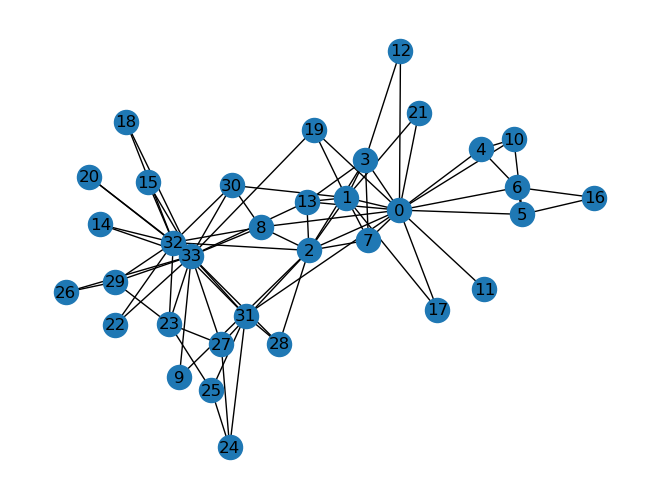

In [42]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

In [49]:
dig = nx.DiGraph()
dig.add_edges_from({(2, 3), (3, 2), (4, 3), (4, 2)})

In [45]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

### undirected node centrality

In [48]:
nx.degree_centrality(G)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

### directed graph centrality

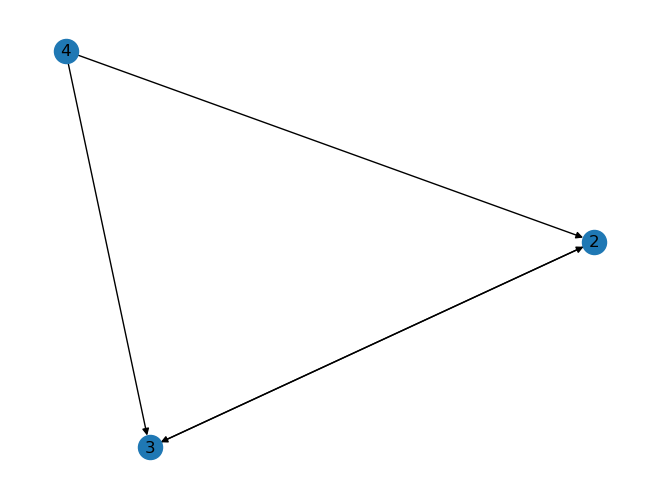

In [55]:
nx.draw(dig,with_labels=True)

In [56]:
nx.in_degree_centrality(dig)
nx.out_degree_centrality(dig)

{2: 0.5, 3: 0.5, 4: 1.0}

### Betweenness centrality(是否为咽喉位置)

In [59]:
nx.betweenness_centrality(G)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

### closeness centrality(去相邻节点是否近)

In [60]:
nx.closeness_centrality(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

### cluster and cluster coefficient(社群属性)

In [63]:
nx.triangles(G)

{0: 18,
 1: 12,
 2: 11,
 3: 10,
 4: 2,
 5: 3,
 6: 3,
 7: 6,
 8: 5,
 9: 0,
 10: 2,
 11: 0,
 12: 1,
 13: 6,
 14: 1,
 15: 1,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 4,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 4,
 30: 3,
 31: 3,
 32: 13,
 33: 15}

In [64]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

## edge feature

### common neighbors and Jaccard coefficient

In [66]:
sorted(nx.common_neighbors(G, 0, 5))

[6, 10]

In [71]:
preds = nx.jaccard_coefficient(G, [(0, 1), (2, 3)])
for i, j, k in preds:
    print(f"{i} , {j} -> {k}")

0 , 1 -> 0.3888888888888889
2 , 3 -> 0.3333333333333333


### katz index

In [80]:
l = nx.normalized_laplacian_matrix(G)
e = np.linalg.eigvals(l.A)

beta = 1 / max(e)

I = np.identity(len(G.nodes))

S = np.linalg.inv(I - beta * nx.to_numpy_array(G)) - I
S

array([[-0.88464927, -0.35661551,  0.09098041, ...,  0.0401081 ,
        -0.07978327,  0.04209948],
       [-0.35661551, -1.55286914,  0.39139514, ...,  0.2858734 ,
        -0.26902833,  0.16729019],
       [ 0.09098041,  0.39139514, -1.16899972, ..., -0.15910606,
         0.28424098, -0.07913156],
       ...,
       [ 0.0401081 ,  0.2858734 , -0.15910606, ..., -1.33756667,
         0.28532693, -0.21595469],
       [-0.07978327, -0.26902833,  0.28424098, ...,  0.28532693,
        -1.37420677,  0.2804895 ],
       [ 0.04209948,  0.16729019, -0.07913156, ..., -0.21595469,
         0.2804895 , -1.30865498]])